# 📌 Урок: Визуализация данных с помощью Pandas и Matplotlib
# 📖 Теоретический минимум
## 🔹 Основные библиотеки визуализации
Matplotlib - базовая библиотека для создания статических, анимированных и интерактивных визуализаций

Pandas - встроенные методы визуализации на основе Matplotlib

Seaborn - библиотека для создания статистических графиков (работает поверх Matplotlib)

## 🔹 Типы графиков и их применение
Линейные графики - тенденции изменения во времени

Столбчатые диаграммы - сравнение категориальных данных

Круговые диаграммы - доли составных частей

Гистограммы - распределение данных

Точечные диаграммы - взаимосвязь между двумя переменными

## 🔹 Основные принципы хорошей визуализации
Простота и ясность

Правильный выбор типа графика

Адекватные подписи и легенда

Оптимальное использование цвета

Отсутствие визуального шума


## 📖 Материалы

https://vkvideo.ru/video-194554202_456239677

https://vkvideo.ru/playlist/-16108331_55984952








In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Загрузка данных из файла Excel
url = "https://docs.google.com/spreadsheets/d/1y9ekfl_0NOFLQtwqzXcJdijcMqquSDUn_XqtW-S7R3Q/export?format=xlsx"

# Чтение листов в два отдельных DataFrame
reservoir_df = pd.read_excel(
    url, sheet_name="Reservoir", index_col=False, parse_dates=["date"]
)
wells_df = pd.read_excel(
    url,
    sheet_name="Wells",
    index_col=False,
    names=["date", "field_id", "well_id", "oil", "gas", "water"],
    parse_dates=["date"],
)

In [41]:
reservoir_df

,date,field_id,well_id,reserves,pressure,oil_density
0,2020-01-01,Старое,1,5428,189,860
1,2020-01-01,Старое,2,5234,193,860
2,2020-01-01,Старое,3,5142,180,860
3,2020-01-01,Старое,3а,5341,180,860
4,2020-01-01,Старое,5,5381,191,860
5,2020-01-01,Новое,1,12734,350,730
6,2020-01-01,Новое,2,15735,350,730
7,2020-01-01,Новое,3,14263,350,730


In [42]:
wells_df

,date,field_id,well_id,oil,gas,water
0,2021-07-01 00:00:00,Новое,1,128.048011,0,0.000000
1,2024-08-01 00:00:00,Старое,1,2.553258,14.42423,274.737692
2,2022-09-01 00:00:00,Старое,3а,0.982410,25.353305,182.408922
3,2023-11-01 00:00:00,Старое,3а,0.754156,25.149471,228.776968
4,2020-04-01 00:00:00,Новое,1,167.177177,0,0.000000
...,...,...,...,...,...,...
919,2023-11-01 00:00:00,Новое,1,70.296660,0,0.000000
920,2022-07-01 00:00:00,Старое,3а,1.140113,24.17841,181.145298
921,2024-01-01 00:00:00,Старое,5,1.957010,85.242499,227.324250
922,2021-04-01 00:00:00,Новое,3,151.104133,0,0.000000



# 🏆 Задания

## 1️⃣ Линейный график динамики добычи нефти
**Задача:**
 Напишите функцию принимающую месторождение и имя скважины и формирующую график добычи нефти по годам

In [43]:
wells_df = wells_df.dropna(how="all")

In [44]:
print(wells_df.iloc[50])

date        2024-08-01 00:00:00
field_id                  Новое
well_id                       3
oil                   65.256964
gas                           0
water                       0.0
Name: 50, dtype: object


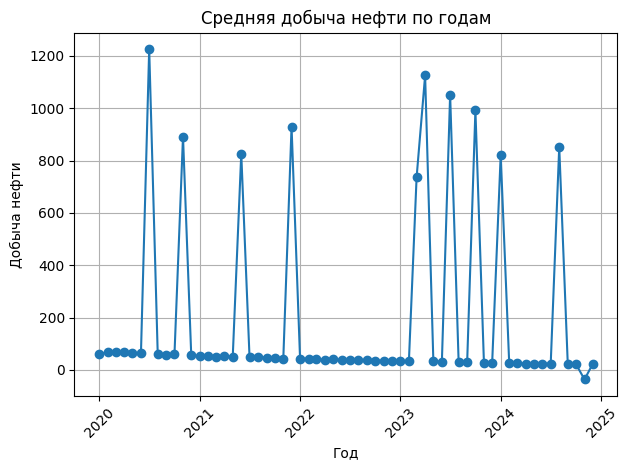

In [45]:
wells_df["date"] = pd.to_datetime(wells_df["date"], errors="coerce")

annual_avg = wells_df.groupby("date")["oil"].mean().reset_index()

plt.plot(annual_avg["date"], annual_avg["oil"], marker="o")
plt.title('Средняя добыча нефти по годам')
plt.xlabel('Год')
plt.ylabel('Добыча нефти')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

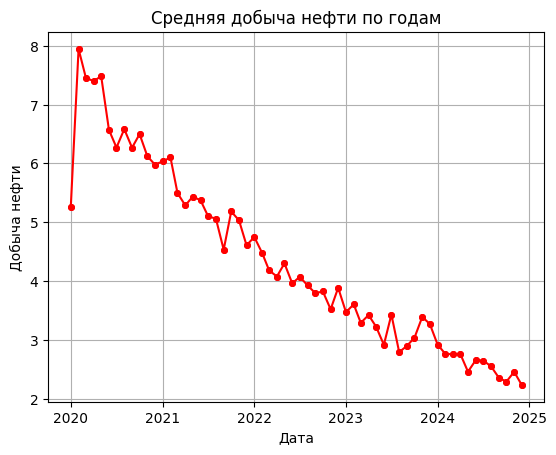

In [46]:
def oil_production(field, well):

    data = wells_df[
        (wells_df["field_id"] == field) & (wells_df["well_id"] == well)
    ].sort_values(["date"])

    plt.plot(data["date"], data["oil"], marker="o", markersize=4, color="r")
    plt.title("Средняя добыча нефти по годам")
    plt.xlabel("Дата")
    plt.ylabel("Добыча нефти")
    plt.grid()


oil_production("Старое", 1)


## 2️⃣ Столбчатая диаграмма

**Задача:**

Напишите функцию формирующую cравнение добычи по месторождениям (столбчатая диаграмма)




  field_id         oil         gas       water
0    Новое  118.128151         0.0    0.000000
1   Старое    2.622548  192.999401  176.817514
range(0, 2)


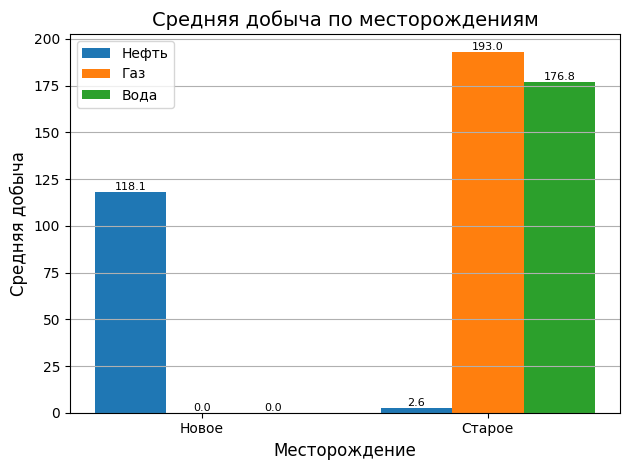

In [47]:
import numpy as np

field_avg = wells_df.groupby("field_id")[["oil", "gas", "water"]].mean().reset_index()
field_avg_sorted = field_avg.sort_values("oil", ascending=False)
print(field_avg_sorted)
positions = range(len(field_avg_sorted))
print(positions)
bar_width = 0.25
bars_oil = plt.bar(
    [p - bar_width for p in positions],
    field_avg_sorted["oil"],
    width=bar_width,
    label="Нефть",
)

bars_gas = plt.bar(positions, field_avg_sorted["gas"], width=bar_width, label="Газ")

bars_water = plt.bar(
    [p + bar_width for p in positions],
    field_avg_sorted["water"],
    width=bar_width,
    label="Вода",
)


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.1f}",
            ha="center",
            va="bottom",
            fontsize=8,
        )


# Добавляем подписи ко всем группам
add_labels(bars_oil)
add_labels(bars_gas)
add_labels(bars_water)

plt.title("Средняя добыча по месторождениям", fontsize=14)
plt.xlabel("Месторождение", fontsize=12)
plt.ylabel("Средняя добыча", fontsize=12)
plt.xticks(positions, field_avg_sorted["field_id"])
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.grid()
plt.show()

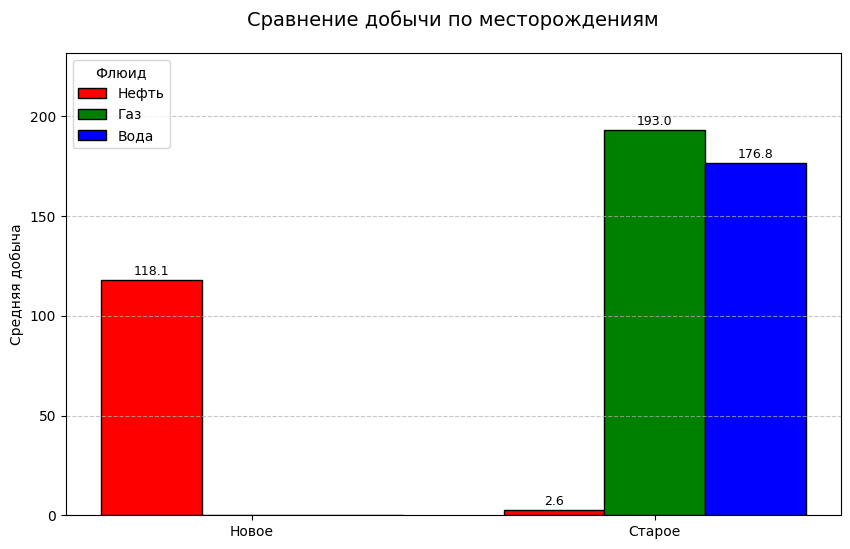

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def production_fields():
    filtered_df = wells_df[wells_df["field_id"].isin(["Старое", "Новое"])].copy()

    for col in ["oil", "gas", "water"]:
        filtered_df[col] = pd.to_numeric(filtered_df[col], errors="coerce")
    filtered_df = filtered_df.dropna(subset=["oil", "gas", "water"])

    grouped = filtered_df.groupby("field_id")[["oil", "gas", "water"]].mean()
    fluids = ["Нефть", "Газ", "Вода"]
    fields = grouped.index.tolist()

    bar_width = 0.25
    x = np.arange(len(fields))
    fig, ax = plt.subplots(figsize=(10, 6))

    colors = ["r", "g", "b"]
    for i, (fluid, col_name) in enumerate(zip(fluids, ["oil", "gas", "water"])):
        values = grouped[col_name].values
        positions = x + i * bar_width
        bars = ax.bar(
            positions,
            values,
            bar_width,
            label=fluid,
            color=colors[i],
            edgecolor="black",
        )

        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + 1,
                    f"{height:.1f}",
                    ha="center",
                    va="bottom",
                    fontsize=9,
                )

    # Настройка осей
    ax.set_ylabel("Средняя добыча", fontsize=10)
    ax.set_title("Сравнение добычи по месторождениям", fontsize=14, pad=20)
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(fields)
    ax.set_ylim(0, grouped.max().max() * 1.2)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Легенда
    ax.legend(title="Флюид", loc="upper left")


production_fields()

## 3️⃣  Круговая диаграмма
**Задача:**Напишите функцию формирующую визуализацию накопленной добычи нефти по скважинам одного месторождения (круговая диаграмма)

---



In [48]:
wells_df = wells_df.drop(wells_df[wells_df["well_id"] == "unknown"].index)

  well_id           oil
0       1  42390.376706
1       2  25730.011649
2       3  74925.931138
3       5    348.854133
4      3а  48483.641627


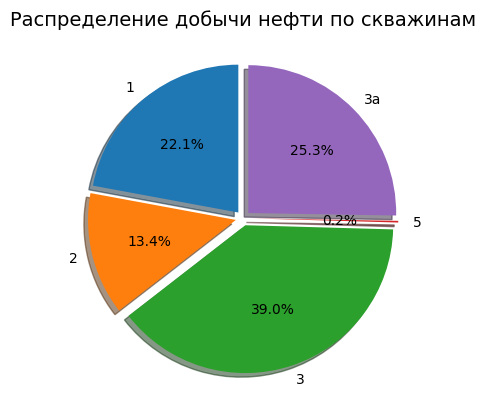

In [49]:
import numpy as np

well_avg = wells_df.groupby("well_id")["oil"].sum().reset_index()
print(well_avg)
data = pd.DataFrame({"Скважины": well_avg["well_id"], "Добыча": well_avg["oil"]})
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(
    data["Добыча"],
    labels=data["Скважины"],
    startangle=90,
    autopct="%1.1f%%",
    explode=explode,
    shadow=True,
)

plt.title("Распределение добычи нефти по скважинам", fontsize=14)

plt.show()

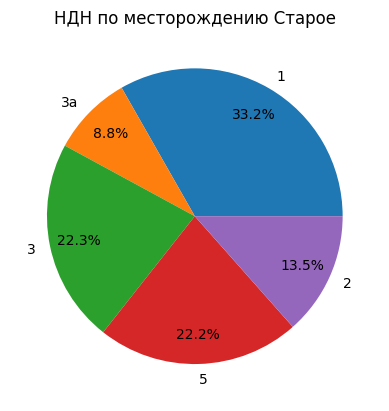

In [51]:
def production_on_wells(field):
    data = wells_df[wells_df["field_id"] == field]
    label = data["well_id"].unique()
    x = [data[data["well_id"] == i]["oil"].sum() for i in label]
    plt.pie(
        x, labels=label, autopct="%.1f%%", pctdistance=0.8, textprops={"fontsize": 10}
    )
    plt.title(f"НДН по месторождению {field}")


production_on_wells("Старое")


## 4️⃣   Tornado plot


**Задача:**  Постройте tornado plot для визуализации накопленной добычи жидкости для каждой скважины.
---




  well_id           oil         water
0       1  42390.376706  21451.503885
1       2  25730.011649  21308.262913
2       3  74925.931138  21437.177569
3       5    348.854133  19959.927058
4      3а  48483.641627  21081.495470
  well_id           oil         water        liquid
3       5    348.854133  19959.927058  20308.781190
1       2  25730.011649  21308.262913  47038.274561
0       1  42390.376706  21451.503885  63841.880591
4      3а  48483.641627  21081.495470  69565.137097
2       3  74925.931138  21437.177569  96363.108707


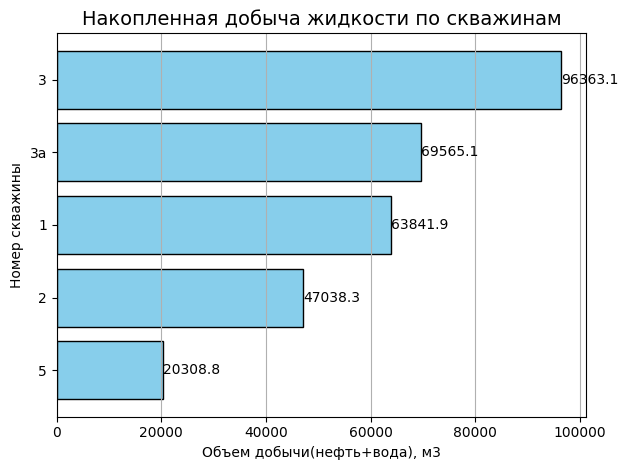

In [ ]:
import numpy as np

well_avg = wells_df.groupby("well_id")[["oil", "water"]].sum().reset_index()
print(well_avg)
well_avg["liquid"] = well_avg["oil"] + well_avg["water"]
well_avg = well_avg.sort_values("liquid")
print(well_avg)

import numpy as np


bar_height = 0.8

bars_liquid = plt.barh(
    well_avg["well_id"].astype(
        str
    ),  # Преобразуем номера скважин в строки (если есть "3a")
    well_avg["liquid"],
    height=bar_height,
    label="Жидкость",
    color='skyblue',
    edgecolor='black'
)

for index, value in enumerate(well_avg["liquid"]):
    plt.text(value, index, f"{value:.1f}", va="center", ha="left", fontsize=10)

plt.title("Накопленная добыча жидкости по скважинам", fontsize=14)
plt.xlabel("Объем добычи(нефть+вода), м3", fontsize=10)
plt.ylabel("Номер скважины", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.grid()
plt.show()

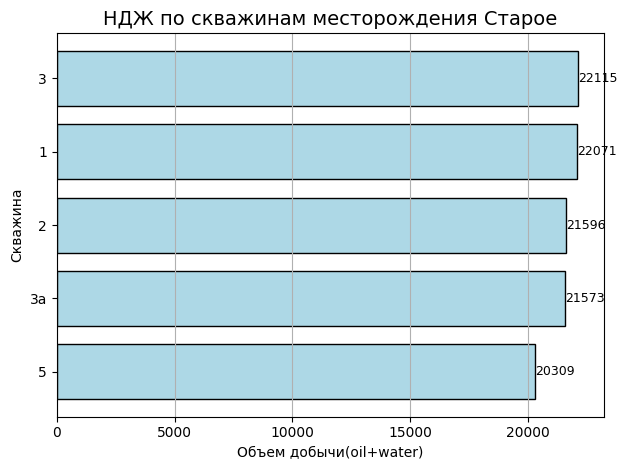

In [52]:
def cum_liquid(field):
    filtered_data = wells_df[wells_df["field_id"] == field]
    data = filtered_data.groupby("well_id")[["oil", "water"]].sum().reset_index()
    data["liquid"] = data["oil"] + data["water"]
    data = data.sort_values("liquid")

    bars_liquid = plt.barh(
        data["well_id"].astype(str),
        data["liquid"],
        height=0.75,
        label="Жидкость",
        color="lightblue",
        edgecolor="black",
    )

    for index, value in enumerate(data["liquid"]):
        plt.text(value, index, f"{value:.0f}", va="center", ha="left", fontsize=9)

    plt.title(f"НДЖ по скважинам месторождения {field}", fontsize=14)
    plt.xlabel("Объем добычи(oil+water)", fontsize=10)
    plt.ylabel("Скважина", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.grid()


cum_liquid("Старое")


## 5️⃣ 3D визуализации
**Задача:**

Создайте изображение в 3D для отображения каждой скважины в осях накопленный дебит нефти, газа, воды

---


In [ ]:
# # Подсказка
ax = plt.figure().add_subplot(projection='3d')

x =  plot_data.oil # Накопленная нефть
y = plot_data.gas # Накопленный газ
z = plot_data.water # Накопленная вода



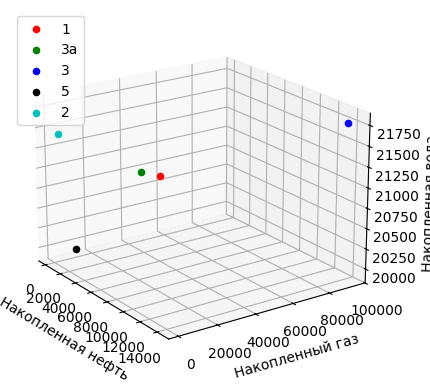

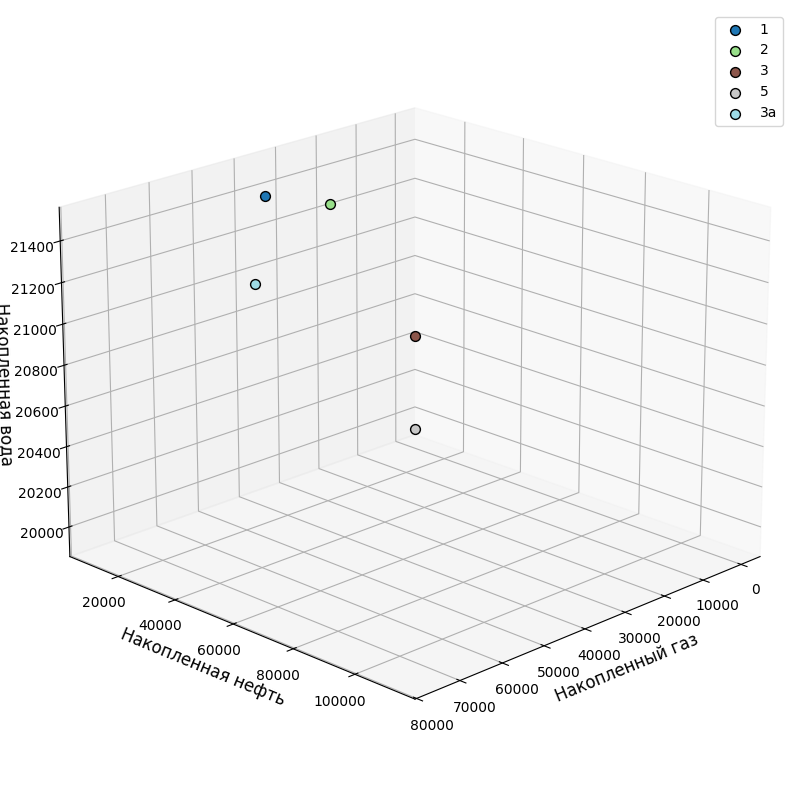

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


plot_data = wells_df.groupby("well_id")[["oil", "gas", "water"]].sum().reset_index()
plot_data["well_id"] = plot_data["well_id"].astype(str)

# Создаем 3D-график
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Данные для осей
y = plot_data.oil  # Накопленная нефть
x = plot_data.gas  # Накопленный газ
z = plot_data.water  # Накопленная вода

# Создание 3D-точек
# scatter = ax.scatter(
#     x, y, z, c=plot_data.water, s=plot_data.oil/100, edgecolor="black", label="Скважины"
# )

# Создание уникального цвета для каждой скважины
unique_wells = plot_data["well_id"].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_wells)))  # Палитра "tab20

# Для каждой скважины рисуем точку с уникальным цветом и меткой
for i, (well_id, color) in enumerate(zip(unique_wells, colors)):
    well_data = plot_data[plot_data["well_id"] == well_id]
    ax.scatter(
        well_data["oil"],
        well_data["gas"],
        well_data["water"],
        s=50,
        color=color,
        edgecolor="black",
        label=f"{well_id}",  # Метка для легенды
    )
ax.set_ylabel("Накопленная нефть", fontsize=12)
ax.set_xlabel("Накопленный газ", fontsize=12)
ax.set_zlabel("Накопленная вода", fontsize=12)


ax.legend()

# Добавление подписей для скважин (опционально)
# for i, row in plot_data.iterrows():
#     ax.text(row.oil, row.gas, row.water, f"{row.well_id}", fontsize=10)

# Угол обзора 
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

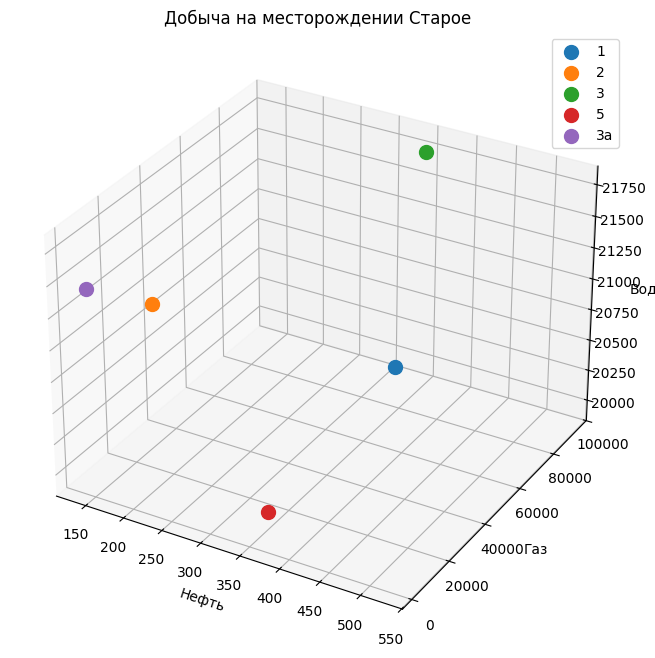

In [53]:
def production_3d(field):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    filtered_data = wells_df[wells_df["field_id"] == field]
    grouped = (
        filtered_data.groupby("well_id")[["oil", "gas", "water"]].sum().reset_index()
    )

    for _, row in grouped.iterrows():
        ax.scatter(
            row["oil"],
            row["gas"],
            row["water"],
            marker="o",
            label=row["well_id"],
            s=100,
        )
    ax.set_xlabel("Нефть")
    ax.set_ylabel("Газ")
    ax.set_zlabel("Вода")
    plt.title(f"Добыча на месторождении {field}")
    ax.legend()


production_3d("Старое")